## K-Means Clustering
K-Means is one of the simplest clustering algorithms that aim to cluster data by assigning fix number of centers
it first tries to assign random centers and then fit them by minimizing the sum of square

this algorithm is easy to implement and understand


In [5]:
# this library is implemented in sklearn
from sklearn.cluster import KMeans
# for working better with data
import pandas as pd
import numpy as np 
# for visualizeing data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#loading dataset
#sklearn has a built-in tool for loading common datasets for educational purposes we used direct loading from CSV
dataset = pd.read_csv('./datasets/Iris.csv')
X = dataset.iloc[:, 0:4 ].values
Y = dataset.iloc[:, [4]].values


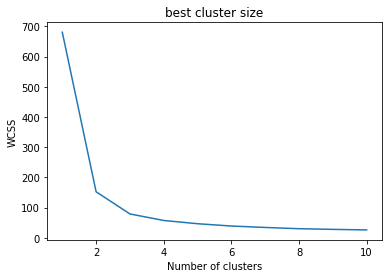

In [35]:
# for making training process repeatable we use constant seed
np.random.seed(5)

wcss = []
# we are using diffrent cluster size to find best fit clustering
for i in range(1, 11):    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 256, n_init = 10, random_state = 0)
    kmeans.fit(X)
#     this we give fit score
    wcss.append(kmeans.inertia_)
    
#Plotting wcss results 
plt.plot(range(1, 11), wcss)
plt.title('best cluster size')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [48]:
#sum of squares show as we increase the number of clusters we will have better result, 
# but from more than 3 centers we won't have a significant increase and we can 3 center  

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 350, n_init = 10, random_state = 0)
kmeans.fit(X)

Y = kmeans.predict(X)

In [49]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

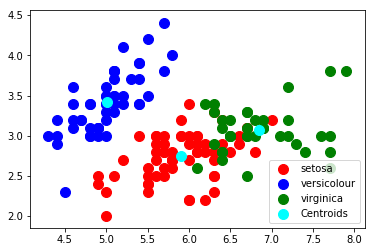

In [55]:
#Visualising the clusters
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'green',  label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.legend()
